In [1]:
import anndata as ad
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from umap import UMAP

sns.set_theme(style="whitegrid")

c:\Users\timov\Repositories\scAGG\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
adata = ad.read_h5ad(filename="out/results/2025-06-18-16-43-30_EVAL_Wang_results.h5ad")

In [35]:
adata_full = adata

In [42]:
# drop neurotypical reference cells
adata = adata_full[~adata_full.obs["Donor ID"].str.startswith("H19.") \
    & ~(adata_full.obs["Neurotypical reference"] == "True")].copy()

In [50]:
adata.obs["Neurotypical reference"].value_counts()

Neurotypical reference
False    1289859
Name: count, dtype: int64

In [53]:
donor_df = adata.obs.reset_index().groupby("Donor ID").first().reset_index()

# and reorder by order of the keys in h_graph_f0
donor_df = donor_df.set_index("Donor ID").reindex(adata.uns["h_graph_f0"].keys()).reset_index()

# drop h18 and h19
donor_df = donor_df[~donor_df["Donor ID"].str.startswith("H18.") \
    & ~donor_df["Donor ID"].str.startswith("H19.")].copy()

C:\Users\timov\AppData\Local\Temp\ipykernel_47220\415484342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  donor_df = adata.obs.reset_index().groupby("Donor ID").first().reset_index()


In [55]:
donor_df

,Donor ID,exp_component_name,sample_id,Neurotypical reference,Organism,Brain Region,Sex,Gender,Age at Death,Race (choice=White),...,all,braaksc,ceradsc,thalsc,Wang,Wang_intermediate,Label,y,train_donor_f0,test_donor_f0
4,H20.33.001,CCATAAGTCGTGTTCC-L8TX_210521_01_G03-1108221667-62,CCATAAGTCGTGTTCC-L8TX_210521_01_G03-1108221667,False,human,Human DFC_all_layers,Male,Male,82.0,Checked,...,62,4.0,3.0,2.0,Intermediate,True,Intermediate,1.0,False,False
5,H20.33.002,CCCAACTGTTGTTGAC-L8TX_210521_01_H04-1108200570-56,CCCAACTGTTGTTGAC-L8TX_210521_01_H04-1108200570,False,human,Human DFC_all_layers,Female,Female,97.0,Checked,...,56,4.0,4.0,0.0,Intermediate,True,Intermediate,1.0,False,False
6,H20.33.004,TAGACCATCGAACACT-L8TX_210610_01_F01-1110733056-66,TAGACCATCGAACACT-L8TX_210610_01_F01-1110733056,False,human,Human DFC_all_layers,Male,Male,86.0,Checked,...,66,5.0,1.0,5.0,AD,False,AD,1.0,False,True
7,H20.33.005,TAGGGTTCAAGCGATG-L8TX_210617_01_A12-1113634354-5,TAGGGTTCAAGCGATG-L8TX_210617_01_A12-1113634354,False,human,Human DFC_all_layers,Female,Female,99.0,Checked,...,5,4.0,2.0,3.0,Intermediate,True,Intermediate,1.0,False,False
8,H20.33.008,GCTGCAGTCTCCGCAT-L8TX_210610_01_F03-1111486763-13,GCTGCAGTCTCCGCAT-L8TX_210610_01_F03-1111486763,False,human,Human DFC_all_layers,Female,Female,92.0,Checked,...,13,5.0,2.0,4.0,Intermediate,True,Intermediate,1.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,H21.33.043,GCTGGGTGTGATATAG-L8TX_210916_01_E04-1131593674-29,GCTGGGTGTGATATAG-L8TX_210916_01_E04-1131593674,False,human,Human DFC_all_layers,Female,Female,95.0,Checked,...,29,2.0,3.0,4.0,Intermediate,True,Intermediate,1.0,False,False
79,H21.33.044,AACAACCCACGCACCA-L8TX_210923_01_A08-1131758239-70,AACAACCCACGCACCA-L8TX_210923_01_A08-1131758239,False,human,Human DFC_all_layers,Female,Female,88.0,Checked,...,70,6.0,1.0,3.0,AD,False,AD,1.0,False,True
80,H21.33.045,AGTAGCTCAACTCCCT-L8TX_211021_01_D04-1139530068-52,AGTAGCTCAACTCCCT-L8TX_211021_01_D04-1139530068,False,human,Human DFC_all_layers,Female,Female,94.0,Unchecked,...,52,6.0,1.0,4.0,AD,False,AD,1.0,False,True
81,H21.33.046,GATGAGGAGCTAGAAT-L8TX_211124_01_D03-1144726144-71,GATGAGGAGCTAGAAT-L8TX_211124_01_D03-1144726144,False,human,Human DFC_all_layers,Male,Male,97.0,Checked,...,71,5.0,2.0,4.0,AD,False,AD,1.0,False,True


In [64]:
# make a donor dataframe to align with the sample-level embeddings
adata.uns["h_graph_f0"]

{'H18.30.002': array([[-0.1343692 , -0.07267617,  0.09669699, -0.2383418 ,  0.7177657 ,
          0.22784102,  0.4843548 , -0.47353607, -0.02626395, -0.20612235,
         -0.1552911 , -0.421587  ,  0.02979665,  1.5470881 , -0.24174546,
         -0.0060487 ,  0.6606488 , -0.52516526,  0.42139798,  0.54796916,
          0.9983313 ,  0.32524523,  1.5378704 ,  0.00875502, -0.24336995,
         -0.32784146, -0.14006709,  0.8018664 ,  0.7776997 ,  0.83558   ,
          0.45077166, -0.29956648, -0.05117662,  1.1357541 , -0.21175338,
         -0.27972656,  0.56578374,  0.5582848 , -0.27725023, -0.2680861 ,
         -0.13187528,  0.07783585,  1.0874739 ,  0.1403896 ,  0.1521919 ,
          0.46206084, -0.35378584, -0.04171937,  0.09117021,  0.8514215 ,
         -0.37057295,  0.6735454 ,  0.2517372 , -0.49344656,  0.6822516 ,
         -0.103721  ,  0.51378745, -0.35301325,  0.27585718, -0.3091128 ,
          0.50981575,  0.40232882, -0.20025373, -0.01797867, -0.08082277,
          0.49576908, -0

In [71]:
x = np.vstack([v for k, v in adata.uns["h_graph_f0"].items() if k in donor_df["Donor ID"].values])

In [72]:
x.shape

(79, 128)

In [ ]:
# add the polygenic risk scores
prss = pd.read_csv("data/PRS.csv", index_col=0)

for donor in donor_df["Donor ID"]:
    if donor not in prss.index:
        print(f"Donor {donor} not found in PRS data.")
        
donor_df["PRS"] = prss.loc[donor_df["Donor ID"]].values
donor_df["PRS_z"] = (donor_df["PRS"] - donor_df["PRS"].mean()) / donor_df["PRS"].std()

c:\Users\timov\Repositories\scAGG\.pixi\envs\default\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


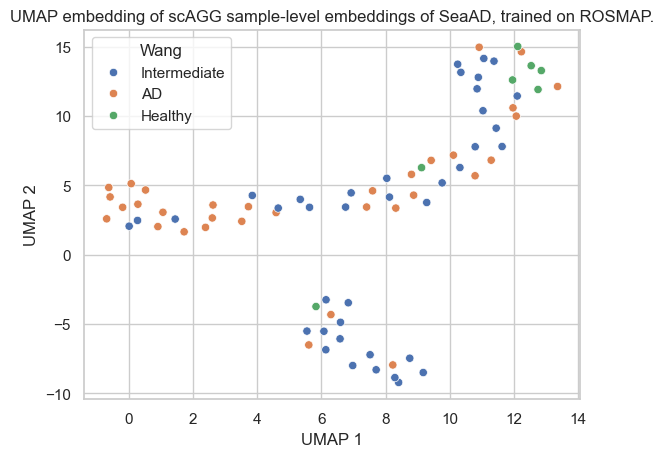

In [ ]:
x_pca = PCA(n_components=50).fit_transform(x)
x_umap = UMAP(n_components=2, n_neighbors=8, min_dist=1).fit_transform(x_pca)

sns.scatterplot(
    x=x_umap[:, 0],
    y=x_umap[:, 1],
    hue=donor_df["Wang"],
    hue_order=["Intermediate", "AD", "Healthy"],
    # palette=sns.color_palette("husl", n_colors=len(donor_df)),
)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP embedding of scAGG sample-level embeddings of SeaAD, trained on ROSMAP.")
plt.show()

c:\Users\timov\Repositories\scAGG\.pixi\envs\default\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


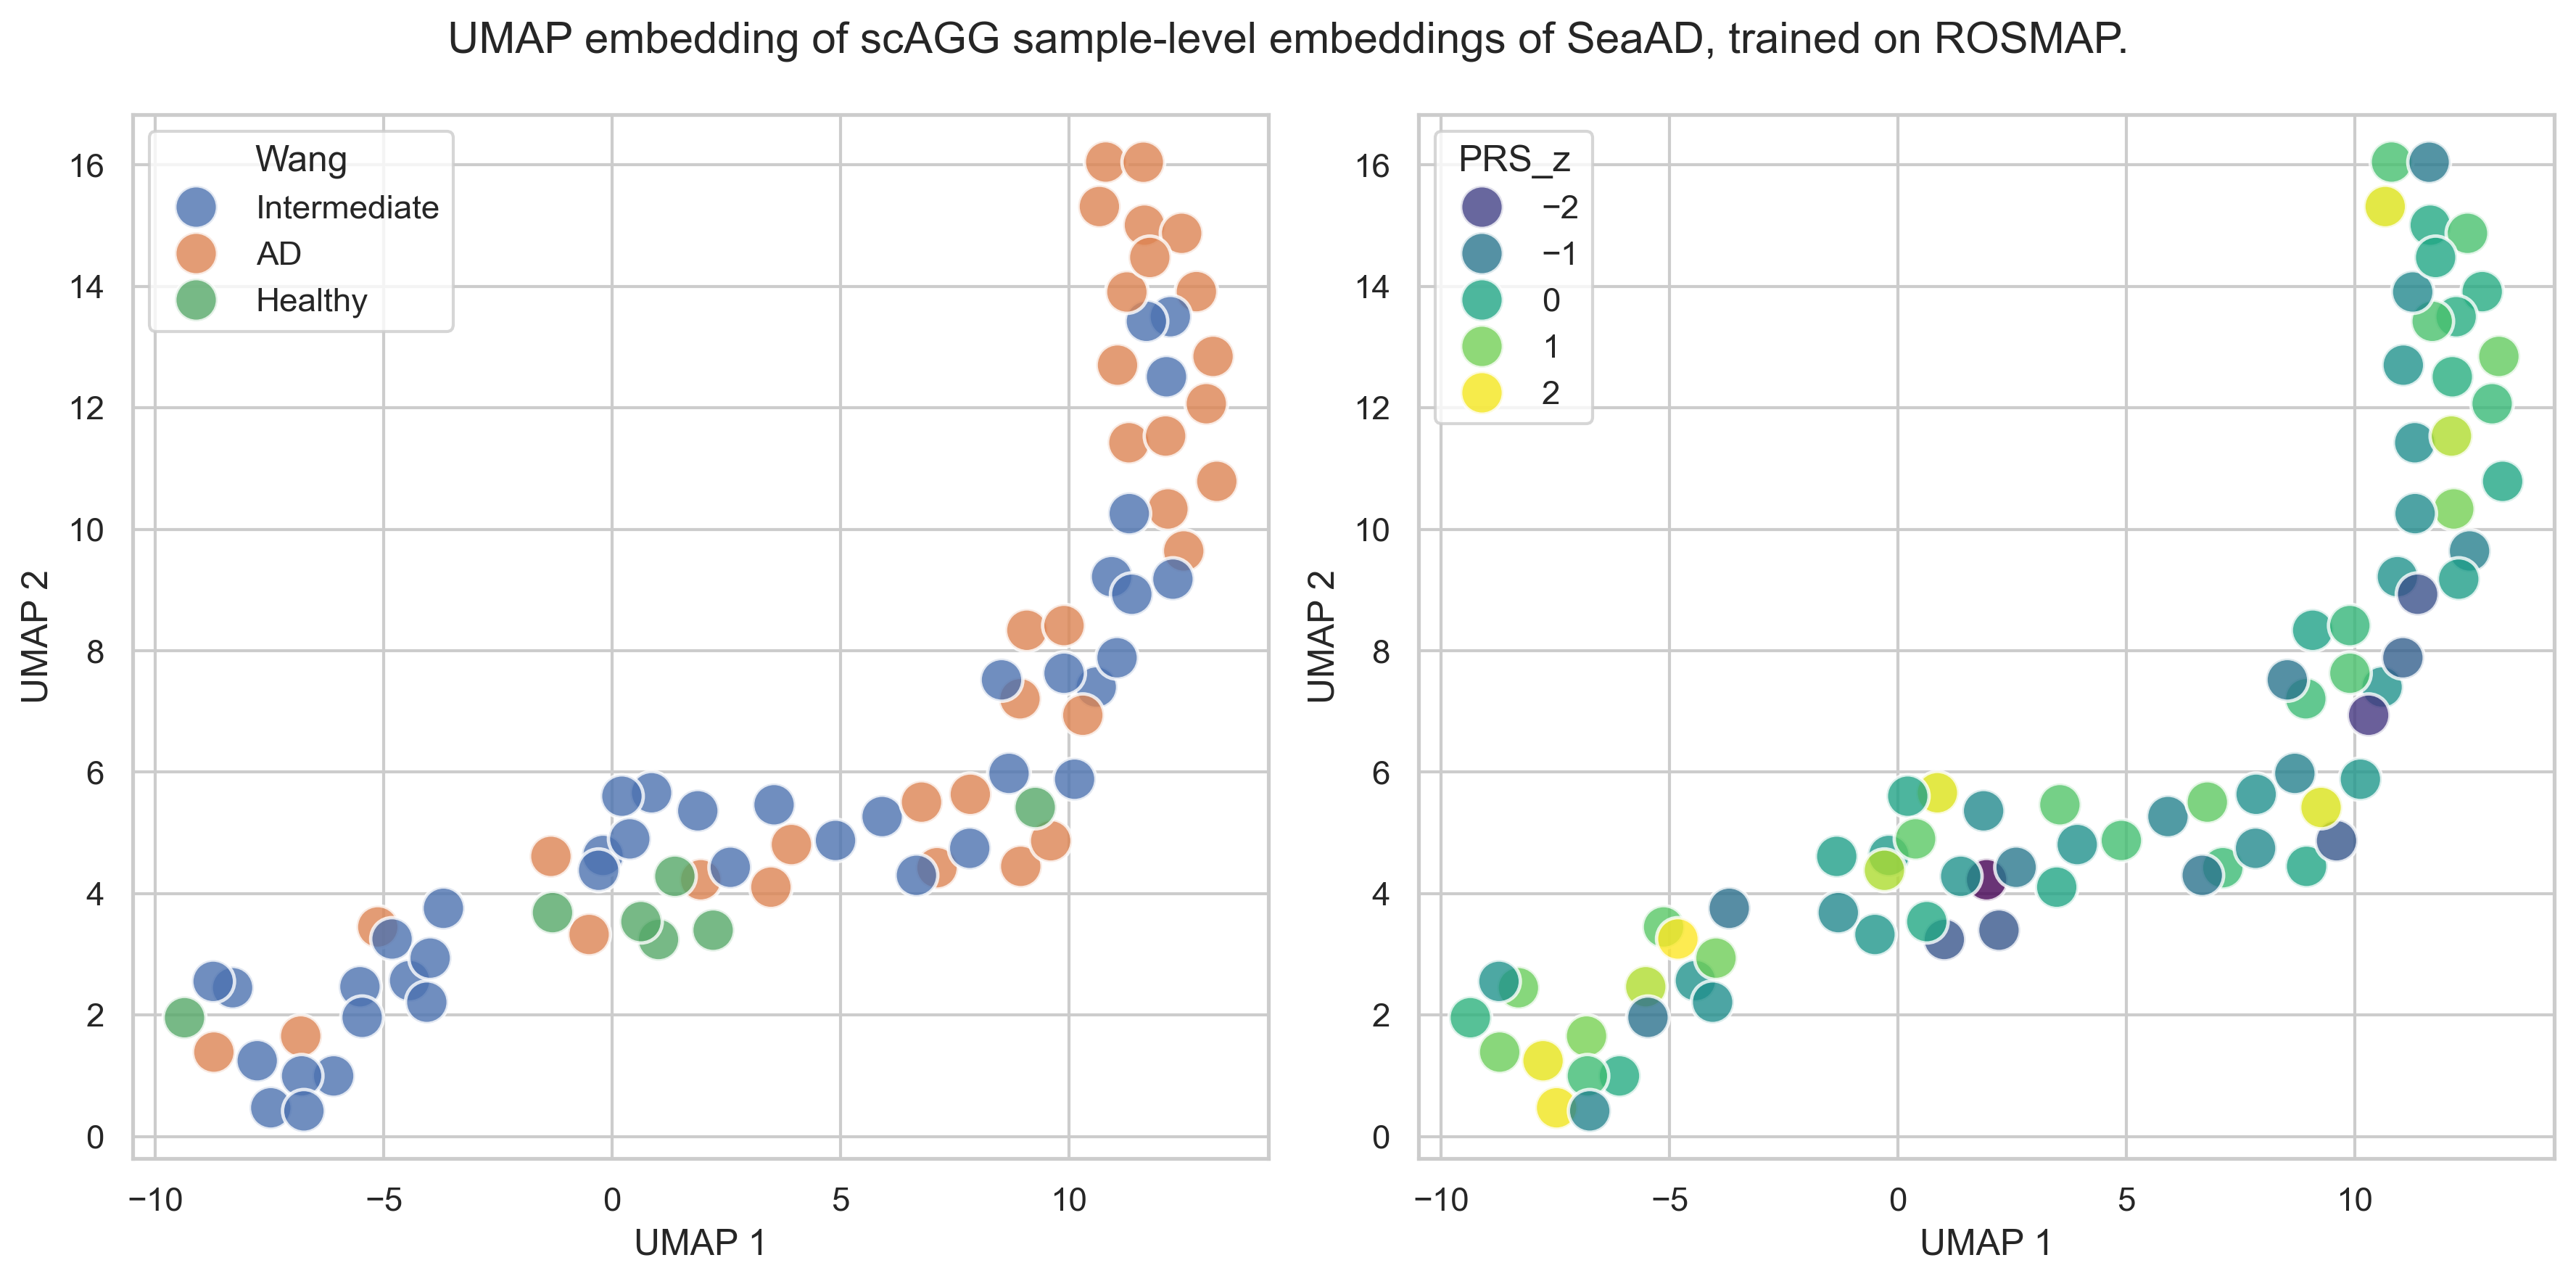

In [113]:
SIZE = 200
ALPHA = 0.8

x_pca = PCA(n_components=50).fit_transform(x)
x_umap = UMAP(n_components=2, n_neighbors=8, min_dist=1).fit_transform(x_pca)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
sns.scatterplot(
    x=x_umap[:, 0],
    y=x_umap[:, 1],
    hue=donor_df["Wang"],
    hue_order=["Intermediate", "AD", "Healthy"],
    ax=axs[0],
    s = SIZE,
    alpha = ALPHA,
)

axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
fig.suptitle("UMAP embedding of scAGG sample-level embeddings of SeaAD, trained on ROSMAP.")

sns.scatterplot(
    x=x_umap[:, 0],
    y=x_umap[:, 1],
    hue=donor_df["PRS_z"],
    hue_order=sorted(donor_df["PRS_z"].unique())[::-1],  # sort in descending order
    palette="viridis",
    ax=axs[1],
    s = SIZE,
    alpha = ALPHA,
)
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
# axs[1].set_title("Polygenic Risk Score (PRS) on UMAP embedding")

plt.tight_layout()


<Axes: xlabel='Wang', ylabel='PRS'>

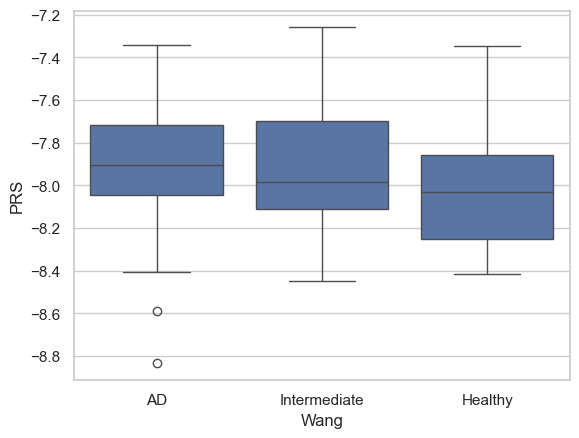

In [112]:
sns.boxplot(
    x=donor_df["Wang"],
    y=donor_df["PRS"],
    order=["AD", "Intermediate", "Healthy"],)

In [ ]:
donor_df["Wang"].value_counts()

Wang
Intermediate    43
AD              33
Healthy          7
Name: count, dtype: int64